# <center> Data Sprint 49 - Hospital Patient Survival </center>
### <center>Predict patient survival based on care conditions</center>

**Import Modules**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("training_data.csv")       #read train dataset

In [3]:
train.head()      #to show first 5 rows

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,16201,47,8433,DX2,60,21.655523,NO,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
1,9421,3,2972,DX6,2,28.852743,NO,RURAL,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0
2,16205,7,8608,Dx6,20,26.179725,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
3,5582,31,10074,dx6,8,22.638945,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
4,20880,43,7462,dx1,53,21.326131,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


**Data Pre-Processing**

In [4]:
train.shape         #to view shape

(25079, 18)

In [5]:
train.info()              #details of each columns in train dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25079 entries, 0 to 25078
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  25079 non-null  int64  
 1   Diagnosed_Condition        25079 non-null  int64  
 2   Patient_ID                 25079 non-null  int64  
 3   Treated_with_drugs         25071 non-null  object 
 4   Patient_Age                25079 non-null  int64  
 5   Patient_Body_Mass_Index    25079 non-null  float64
 6   Patient_Smoker             25079 non-null  object 
 7   Patient_Rural_Urban        25079 non-null  object 
 8   Patient_mental_condition   25079 non-null  object 
 9   A                          23723 non-null  float64
 10  B                          23723 non-null  float64
 11  C                          23723 non-null  float64
 12  D                          23723 non-null  float64
 13  E                          23723 non-null  flo

In [6]:
#to drop unimportant columns from train dataset 
train = train.drop(['Treated_with_drugs','A','B','C','D','E','F','Z','ID_Patient_Care_Situation','Patient_ID'],axis=1)

In [7]:
def change(x):
    if x == 'NO':
        return 'NO'
    elif x=='YES' or x=='YESS':
        return 'YES'
    else:
        return 'CANNOT SAY'

In [8]:
#to fill missing value with '0.0'
train['Number_of_prev_cond']=train['Number_of_prev_cond'].fillna(0.0)

In [9]:
#to change categorical value 
train['Patient_Smoker'] = train['Patient_Smoker'].apply(change) 

In [10]:
train.isna().sum().sum()    #to check missing value in entire train dataset

0

**On Test Set**

In [11]:
test = pd.read_csv("testing_data.csv")               #to read test dataset 

In [12]:
test.head()         #to view first 5 rows 

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,24206,35,4640,DX5,65,20.710365,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,32827,30,3214,dx1,2,24.250219,NO,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
2,3694,46,3564,dx6,1,27.139276,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,7164,44,5176,DX1,29,29.191759,NO,RURAL,Stable,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0
4,1259,30,1101,DX5,51,20.844146,NO,URBAN,Stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [13]:
test.shape              #to view shape

(9330, 17)

In [14]:
#to drop unnesscary column from test dataset 
test = test.drop(['Treated_with_drugs','A','B','C','D','E','F','Z','ID_Patient_Care_Situation','Patient_ID'],axis=1)

In [15]:
test.info()               #to view each column details of test data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9330 entries, 0 to 9329
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Diagnosed_Condition       9330 non-null   int64  
 1   Patient_Age               9330 non-null   int64  
 2   Patient_Body_Mass_Index   9330 non-null   float64
 3   Patient_Smoker            9330 non-null   object 
 4   Patient_Rural_Urban       9330 non-null   object 
 5   Patient_mental_condition  9330 non-null   object 
 6   Number_of_prev_cond       9330 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 510.4+ KB


In [16]:
#to change categorical value 
test['Patient_Smoker'] = test['Patient_Smoker'].apply(change)  

In [17]:
test.isna().sum().sum()             # to check missing value in entire test dataset 

0

In [18]:
test = pd.get_dummies(test)    #one-hot encoding 

**Spliting Data**

In [19]:
#to split data in independent variable and target variable
X = train.drop(['Survived_1_year'],axis=1)
y = train['Survived_1_year']

In [20]:
X = pd.get_dummies(X)      #one-hot encoding to X data 

In [21]:
#to split entire train into X_train , X_test , y_train , y_test data 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,train_size=0.8,random_state=42)

In [22]:
#to view shape of each dataset 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20063, 10)
(5016, 10)
(20063,)
(5016,)


In [23]:
X.head()

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,Number_of_prev_cond,Patient_Smoker_CANNOT SAY,Patient_Smoker_NO,Patient_Smoker_YES,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN,Patient_mental_condition_Stable
0,47,60,21.655523,2.0,0,1,0,0,1,1
1,3,2,28.852743,3.0,0,1,0,1,0,1
2,7,20,26.179725,2.0,0,1,0,1,0,1
3,31,8,22.638945,2.0,0,1,0,1,0,1
4,43,53,21.326131,1.0,0,1,0,1,0,1


<AxesSubplot:xlabel='Diagnosed_Condition', ylabel='Density'>

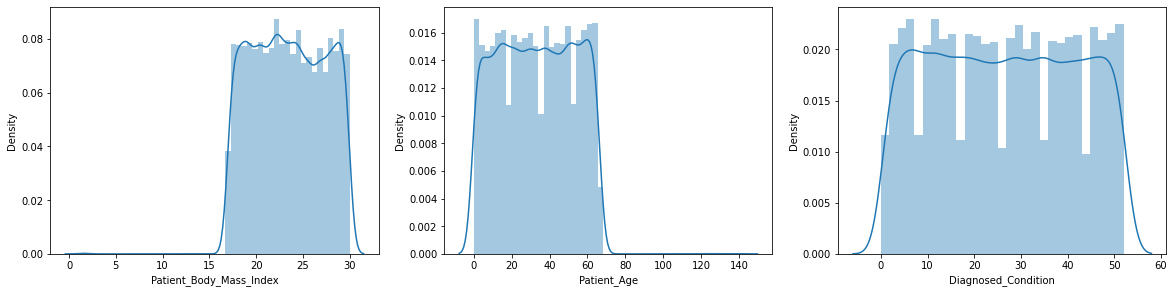

In [24]:
plt.figure(figsize=(20,10))

plt.subplot(231)
sns.distplot(X['Patient_Body_Mass_Index'])

plt.subplot(232)
sns.distplot(X['Patient_Age'])

plt.subplot(233)
sns.distplot(X['Diagnosed_Condition'])

<AxesSubplot:>

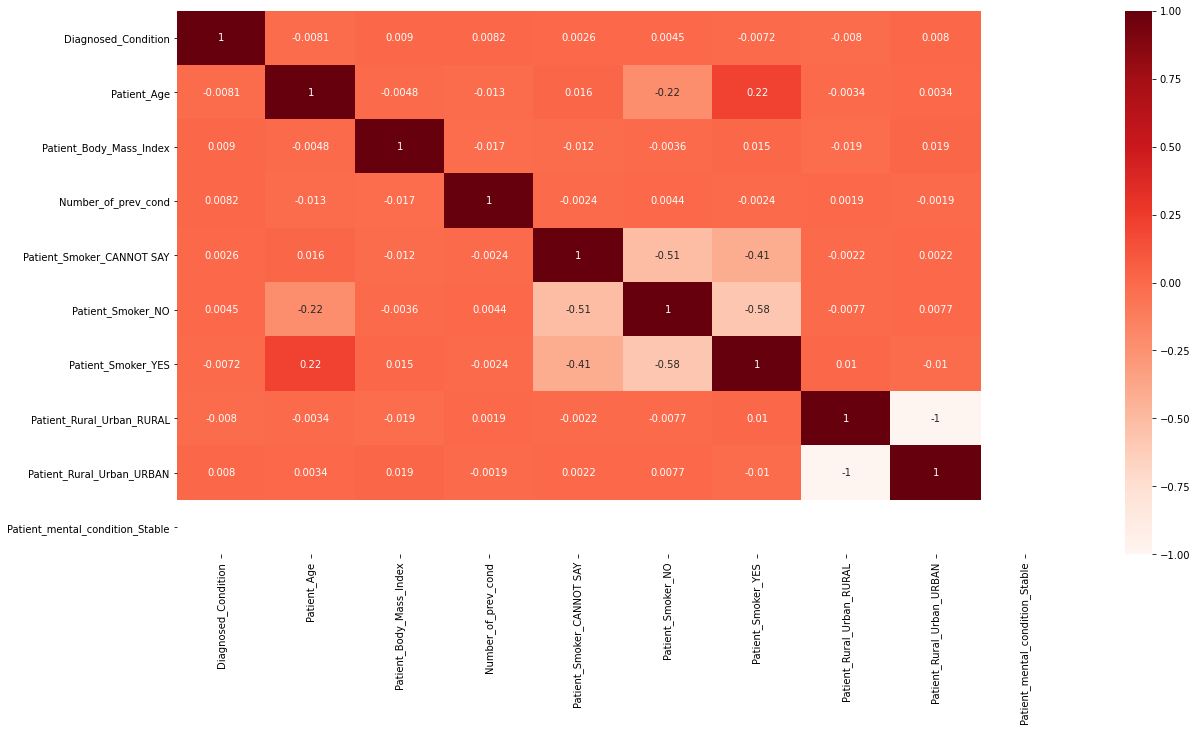

In [25]:
plt.figure(figsize=(20,10))
sns.heatmap(X.corr(),annot=True,cmap='Reds')

**Build Model**

In [26]:
#use RandomForestClassifier model
model = RandomForestClassifier(n_estimators=200,oob_score=True,n_jobs=-1,max_features=None,min_samples_leaf=23)

In [27]:
#fit the model
model.fit(X_train,y_train)

RandomForestClassifier(max_features=None, min_samples_leaf=23, n_estimators=200,
                       n_jobs=-1, oob_score=True)

In [28]:
#predict on X_test 
y_pred=model.predict(X_test)
y_pred

array([1, 1, 0, ..., 1, 1, 0], dtype=int64)

In [29]:
#apply f1_score on actual set and predict set 
f1_score(y_test,y_pred)

0.8253874538745387

<AxesSubplot:>

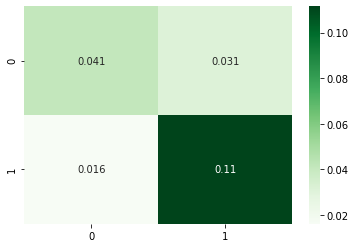

In [30]:
sns.heatmap(confusion_matrix(y_test,y_pred) / len(y), cmap='Greens', annot=True)

**prediction on test dataset**

In [31]:
predictions = model.predict(test)

In [32]:
res = pd.DataFrame(predictions) 
res.index = test.index 
res.columns = ["prediction"]
res.to_csv("prediction_results.csv", index = False)   